In [70]:
!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"
!mv SimHei.ttf /usr/share/fonts/truetype/

--2021-07-22 05:14:38--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  17.7MB/s    in 0.6s    

2021-07-22 05:14:39 (17.7 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
replace chinese.simhei.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chinese.simhei.ttf      
  inflating: SimHei.ttf              
replace sharefonts.net.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sharefonts.net.txt      


In [71]:
%matplotlib inline

import matplotlib.font_manager as fm
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
path = '/usr/share/fonts/truetype/SimHei.ttf'
fontprop = fm.FontProperties(fname=path, size=13)
import seaborn as sns  
sns.set(font=fontprop.get_name()) 
%matplotlib inline   


from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [72]:
import datetime
!pip install yfinance
import yfinance as yf
def get_data(stocks,start_date,end_date):
    '''stocks为股票代码和简称字典'''
    data=pd.DataFrame()
    for code,name in stocks.items():
        dd = yf.Ticker(code)
        data[name]=dd.history(start=start_date,end=end_date)['Close']
    data=data.iloc[2:,:].fillna(method='ffill')
    return data
StockIndexs = {
    '000001.SS':'上证综指',
    '^DJI':'道琼斯',
    '^IXIC':'纳斯达克',
    '^N225':'日经225',
    '^HSI' :'香港恒生',
    '^FCHI':'法国CAC40', 
    '^GDAXI':'德国DAX'}

start_date='2008-01-01'
end_date='2019-10-31'
data=get_data(StockIndexs ,start_date,end_date)
data.head()

,上证综指,道琼斯,纳斯达克,日经225,香港恒生,法国CAC40,德国DAX
Date,,,,,,,
2008-01-04,5361.574219,12800.179688,2504.649902,NaN,27519.689453,5446.790039,7808.689941
2008-01-07,5393.342773,12827.490234,2499.459961,14500.549805,27179.490234,5452.830078,7817.169922
2008-01-08,5386.530762,12589.070312,2440.510010,14528.669922,27112.900391,5495.669922,7849.990234
2008-01-09,5435.807129,12735.309570,2474.550049,14599.160156,27615.849609,5435.419922,7782.709961
2008-01-10,5456.541016,12853.089844,2488.520020,14388.110352,27230.859375,5400.430176,7713.089844


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35777 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29756 missing from current font.
  font.set_

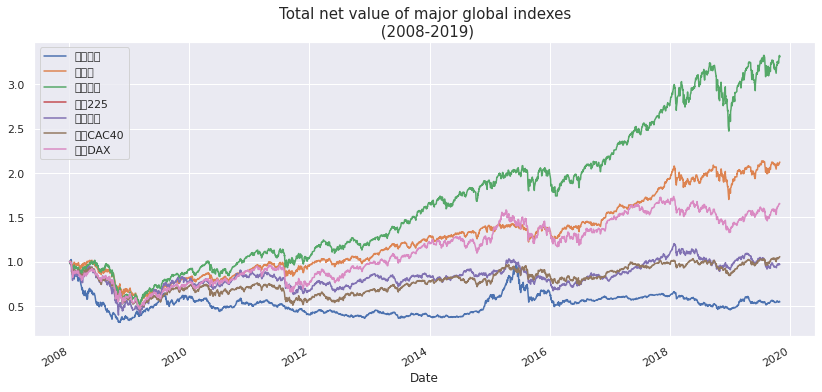

In [73]:

sns.set(font=fontprop.get_name()) 
(data/data.iloc[0]).plot(figsize=(14,6))
# plt.title('全球主要指数累计净值\n (2008-2019)',size=15,fontproperties=fontprop)
plt.title('Total net value of major global indexes\n (2008-2019)',size=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24503 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36947 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26031 missing from current font.
  font.set_

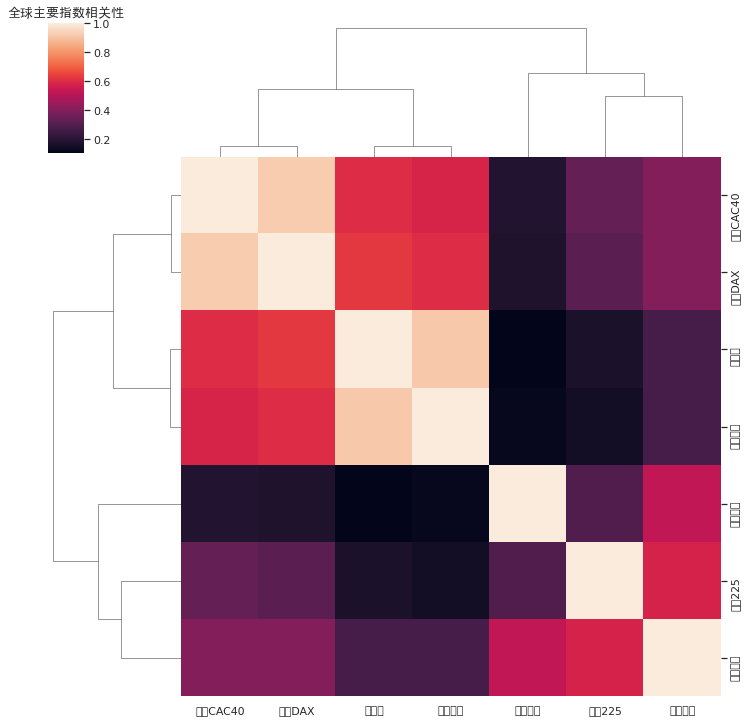

In [74]:

ret=data.apply(lambda x : (x/x.shift(1)-1)*100).dropna()
sns.set(font=fontprop.get_name())
sns.clustermap(ret.corr())
# plt.title('全球主要指数相关性',size=15)
plt.title('全球主要指数相关性',size=15,fontproperties=fontprop)
plt.show()

In [75]:
def get_variables(ret):

    '''ret为上述指数收益率数据'''
    df=pd.DataFrame()
    df['lag1']=ret['上证综指'].shift(1)
    df['lag2']=ret['上证综指'].shift(2)
    df['DJ']=ret['道琼斯'].shift(1)
    df['DA']=ret['德国DAX'].shift(1)
    df['RJ']=ret['日经225'].shift(1)
    #上涨用1表示，下跌（含0）为-1
    df['direction']=np.where(ret['上证综指'].values>0,1.0,-1.0)
    df=df.dropna()
    return df
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
def fit_model(name, model, X_train, y_train, X_test, pred):
    """使用LR, LDA 、QDA对数据进行模型拟合
    """
    # Fit and predict the model on the training, and then test, data
    model.fit(X_train, y_train)
    pred[name] = model.predict(X_test)
    score=accuracy_score(pred['Actual'], pred[name])
    print("%s模型: %.3f" % (name, score)) 
if __name__ == "__main__":
    variables = get_variables(ret).loc[:'2017']
    X = variables.iloc[:,:-1]
    y = variables.iloc[:,-1]
    #X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)
    start_test = datetime.datetime(2017,1,1)
    X_train = X[X.index < start_test]
    X_test = X[X.index >= start_test]
    y_train = y[y.index < start_test]
    y_test = y[y.index >= start_test]
    pred = pd.DataFrame(index=y_test.index)
    pred["Actual"] = y_test 
    print ("precision:")
    models = [("LR", LogisticRegression(solver='liblinear')), ("LDA", LDA()), ("QDA", QDA())]
    for m in models:
        fit_model(m[0], m[1], X_train, y_train, X_test, pred)

precision:
LR模型: 0.561
LDA模型: 0.566
QDA模型: 0.590


In [76]:
model=QDA()

model.fit(X_train, y_train)
pred = model.predict(X_test)
cm = pd.crosstab(y_test,pred)
cm
#sns.heatmap(cm, annot = True, cmap = 'GnBu', fmt = 'd')
print('accuracy：\n',accuracy_score(y_test, pred))
print('report：\n',classification_report(y_test, pred))

accuracy：
 0.5901639344262295
report：
               precision    recall  f1-score   support

        -1.0       0.60      0.03      0.06       101
         1.0       0.59      0.99      0.74       143

    accuracy                           0.59       244
   macro avg       0.59      0.51      0.40       244
weighted avg       0.59      0.59      0.46       244



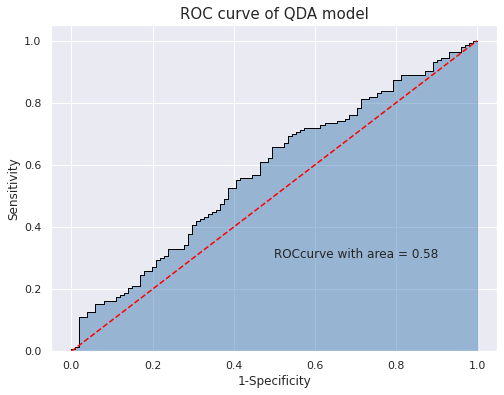

In [77]:

import sklearn
y_score = model.predict_proba(X_test)[:,1]
#fpr表示1-Specificity,tpr表示Sensitivity
fpr,tpr,threshold = roc_curve(y_test, y_score)

roc_auc = sklearn.metrics.auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1)

plt.plot([0,1],[0,1], color = 'red', linestyle = '--')

plt.text(0.5,0.3,'ROCcurve with area = %0.2f' % roc_auc)

plt.title('ROC curve of QDA model',size=15)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()